In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {wine.target_names}")
print(f"Feature names: {wine.feature_names}\n")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}\n")

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

dt_classifier.fit(X_train, y_train)


Dataset Information:
Number of samples: 178
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Training set size: 124
Testing set size: 54



DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
# Make predictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("=" * 50)
print("MODEL EVALUATION")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}\n")

# Classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=wine.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# Feature importance
feature_importance = dt_classifier.feature_importances_
feature_names = wine.feature_names

print("\nFeature Importance:")
for name, importance in sorted(zip(feature_names, feature_importance),
                               key=lambda x: x[1], reverse=True):
    if importance > 0:
        print(f"{name}: {importance:.4f}")

MODEL EVALUATION
Training Accuracy: 0.9839
Testing Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

Feature Importance:
flavanoids: 0.4269
color_intensity: 0.4246
proline: 0.1093
total_phenols: 0.0302
malic_acid: 0.0090


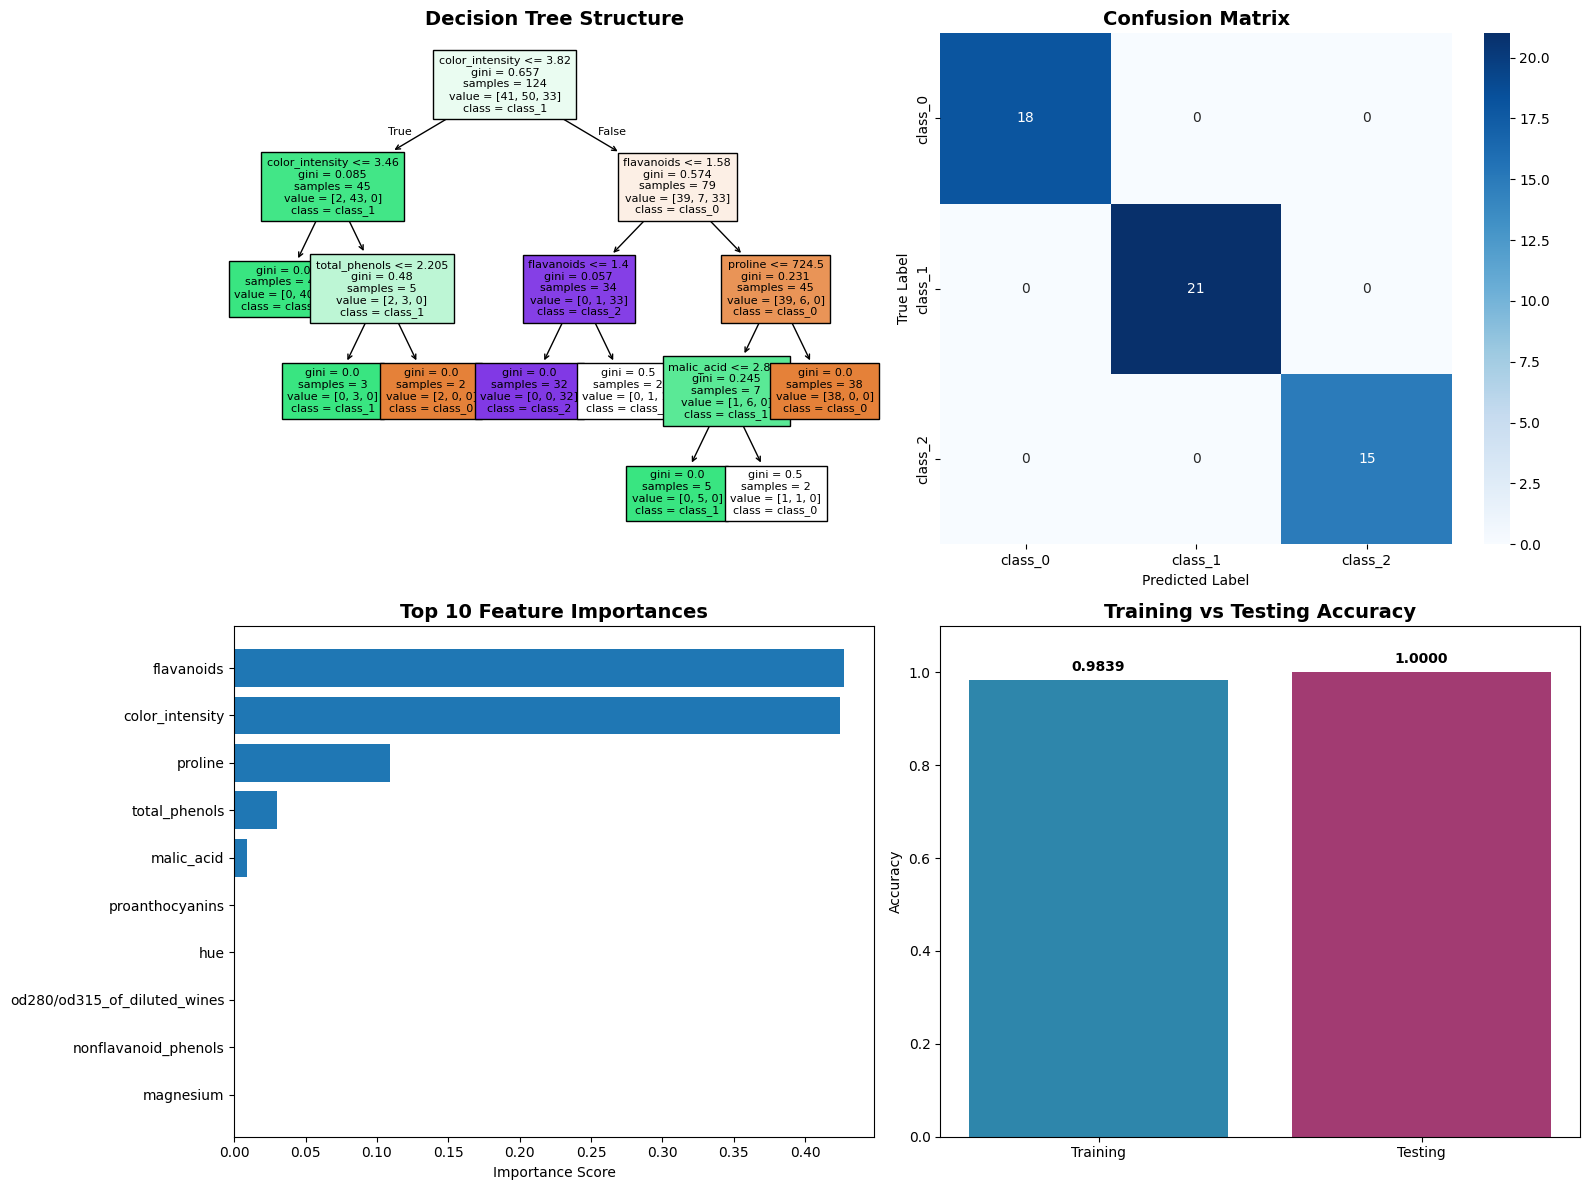


Visualization complete!


In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Decision Tree visualization
plot_tree(dt_classifier,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          ax=axes[0, 0],
          fontsize=8)
axes[0, 0].set_title("Decision Tree Structure", fontsize=14, fontweight='bold')
# 2. Confusion Matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix", fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')
# 3. Feature Importance bar chart
sorted_idx = np.argsort(feature_importance)[::-1]
top_n = 10
axes[1, 0].barh(range(top_n), feature_importance[sorted_idx][:top_n])
axes[1, 0].set_yticks(range(top_n))
axes[1, 0].set_yticklabels([feature_names[i] for i in sorted_idx[:top_n]])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title("Top 10 Feature Importances", fontsize=14, fontweight='bold')

# 4. Accuracy comparison
accuracy_data = [train_accuracy, test_accuracy]
axes[1, 1].bar(['Training', 'Testing'], accuracy_data, color=['#2E86AB', '#A23B72'])
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim([0, 1.1])
axes[1, 1].set_title("Training vs Testing Accuracy", fontsize=14, fontweight='bold')
for i, v in enumerate(accuracy_data):
    axes[1, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nVisualization complete!")